In [1]:
import rebound
import numpy as np
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-4,a=23., e=0.1, inc=10*np.pi/180)
sim.move_to_com()  # Moves to the center of momentum frame
ps = sim.particles

In [2]:
tau_a = 100000.
nep_a_f=32.
nep_a_i=23.
neptune_ind = 1
force_is_velocity_dependent = False
def migrationForces(reb_sim, rebx_effect):
    sim = reb_sim.contents
    ps = sim.particles
    global tau_a, nep_a_f, nep_a_i, neptune_ind
    #neptune in the indice of planet neptune
    v=np.array([ps[neptune_ind].vx, ps[neptune_ind].vy, ps[neptune_ind].vz])
    v_unit=v/(v[0]*v[0] + v[1]*v[1] + v[2]*v[2])**0.5

    c=-(nep_a_f**-0.5-nep_a_i**-0.5)*np.exp(-sim.t/tau_a)

    r_ddot=v_unit*(c/tau_a)

    ps[neptune_ind].ax += r_ddot[0]
    ps[neptune_ind].ay += r_ddot[1]
    ps[neptune_ind].az += r_ddot[2]

In [3]:
import reboundx
rebx = reboundx.Extras(sim)
rebx.add_modify_orbits_forces()
rebx.add_custom_force(migrationForces, force_is_velocity_dependent)
ps[1].tau_e = -tau_a
ps[1].tau_inc = -tau_a

In [4]:
Nout = 1000
a,e,inc=np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0.,2*tau_a, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    a[i] = ps[1].a
    e[i] = ps[1].e 
    inc[i] = ps[1].inc

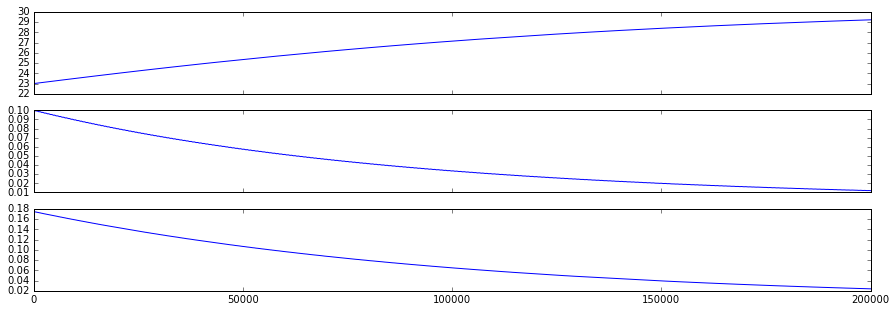

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(figsize=(15,5), nrows=3, sharex=True)
axarr[0].plot(times, a)
axarr[1].plot(times, e)
axarr[2].plot(times, inc)
axarr[2].xlabel="time"